<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-Validation-and-Train-loss" data-toc-modified-id="Plot-Validation-and-Train-loss-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot Validation and Train loss</a></span></li><li><span><a href="#Extract-relevant-Data-to-df" data-toc-modified-id="Extract-relevant-Data-to-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extract relevant Data to df</a></span><ul class="toc-item"><li><span><a href="#Get-best-result" data-toc-modified-id="Get-best-result-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get best result</a></span></li><li><span><a href="#Consider-Outliers" data-toc-modified-id="Consider-Outliers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Consider Outliers</a></span></li></ul></li><li><span><a href="#Results-by-model" data-toc-modified-id="Results-by-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results by model</a></span><ul class="toc-item"><li><span><a href="#Remove-Duplicates" data-toc-modified-id="Remove-Duplicates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Remove Duplicates</a></span></li></ul></li><li><span><a href="#Each-variable-plotted-against-loss:" data-toc-modified-id="Each-variable-plotted-against-loss:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Each variable plotted against loss:</a></span></li><li><span><a href="#Investigate-&quot;band&quot;-in-loss-model-plot" data-toc-modified-id="Investigate-&quot;band&quot;-in-loss-model-plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Investigate "band" in loss-model plot</a></span><ul class="toc-item"><li><span><a href="#Extract-the-different-bands-and-inpsect" data-toc-modified-id="Extract-the-different-bands-and-inpsect-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Extract the different bands and inpsect</a></span></li></ul></li><li><span><a href="#Investigate-Duplicates" data-toc-modified-id="Investigate-Duplicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Investigate Duplicates</a></span></li><li><span><a href="#Investigate-Best" data-toc-modified-id="Investigate-Best-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Investigate Best</a></span></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%cd ..

C:\Users\julia\Documents\Imperial\DA_project


In [30]:
import os
import sys
from notebooks import utils
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#import pipeline
# parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# sys.path.append(parent_dir) #to import pipeline



In [31]:
###CHANGE THIS FILE TO THE SUBDIRECTORY OF INTEREST:
exp_dirs = ["experiments/07b/", "experiments/DA3_2/07a/0", "experiments/DA3_2/07a/1"]

In [32]:
results = utils.extract_res_from_files(exp_dirs)

6 experiments conducted


In [33]:
#load data when utils isnt working:
if False:
    import pickle
    res_fp =  "experiments/results/ResNeXt/res.txt"
    with open(res_fp, "rb") as f:
        results = pickle.load(f)

## Plot Validation and Train loss

(2, 3)


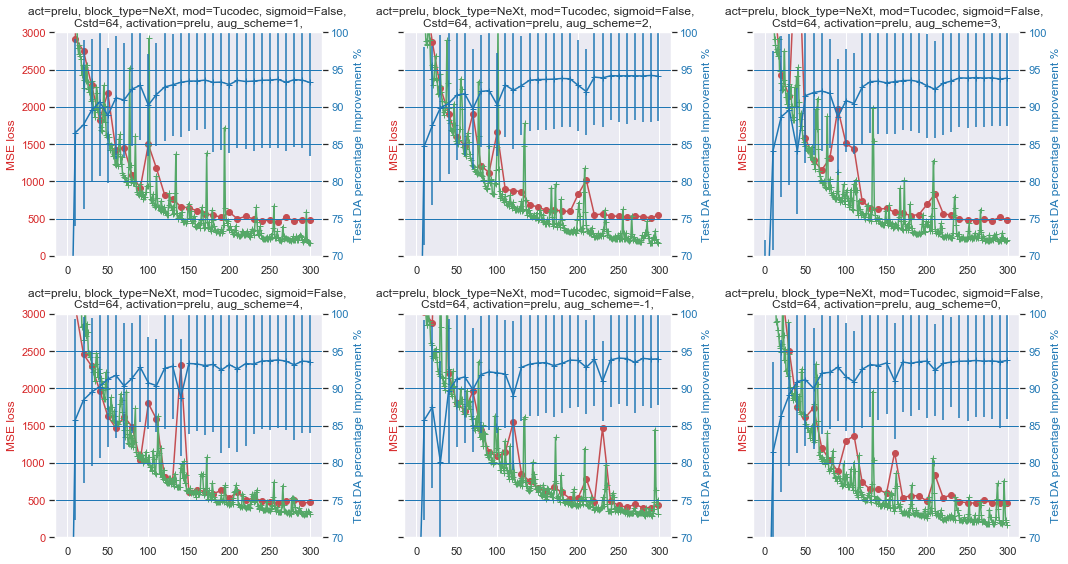

In [34]:


ylim = (0, 3000)
ylim2 = (70,100)


utils.plot_results_loss_epochs(results, ylim1=ylim, ylim2=ylim2)


## Extract relevant Data to df
Use minimum validation loss as criterion.  

In theory (if we had it) it would be better to use DA MAE


In [22]:
df_res = utils.create_res_df(results)
df_res_original = df_res.copy() #save original (in case you substitute out)
df_res

,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer,augmentation,batch_norm,channels,conv_changeover,dropout,first_channel,learning_rate,path
0,CLIC,457.535786,prelu,??,??,None,??,1.0,0.0,see model def,10.0,0.0,e,0.0002,experiments/07b/0
1,CLIC,510.884187,prelu,??,??,None,??,1.0,0.0,see model def,10.0,0.0,e,0.0002,experiments/07b/1
2,CLIC,465.736233,prelu,??,??,None,??,1.0,0.0,see model def,10.0,0.0,e,0.0002,experiments/07b/2
3,CLIC,458.128230,prelu,??,??,None,??,1.0,0.0,see model def,10.0,0.0,e,0.0002,experiments/07b/3
4,CLIC,397.938462,prelu,??,??,None,??,1.0,0.0,see model def,10.0,0.0,e,0.0002,experiments/DA3_2/07a/0
5,CLIC,454.856673,prelu,??,??,None,??,1.0,0.0,see model def,10.0,0.0,e,0.0002,experiments/DA3_2/07a/1


### Get best result

In [23]:
df_res["valid_loss"].idxmin()

print(df_res.loc[df_res["valid_loss"].idxmin()])
df_res.loc[df_res["valid_loss"].idxmin()]["path"]


model                                 CLIC
valid_loss                         397.938
activation                           prelu
latent_dims                             ??
num_layers                              ??
total_channels                        None
channels/layer                          ??
augmentation                             1
batch_norm                               0
channels                     see model def
conv_changeover                         10
dropout                                  0
first_channel                            e
learning_rate                       0.0002
path               experiments/DA3_2/07a/0
Name: 4, dtype: object


'experiments/DA3_2/07a/0'

### Consider Outliers

In [10]:
#consider third experiment run (lots of outliers)
df3 = df_res[df_res["path"].str.contains("CAE_zoo3")]

df_outlier =  df_res[df_res["valid_loss"] > 150000]

df_outlier

,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer,batch_norm,channels,conv_changeover,first_channel,learning_rate,path


## Results by model

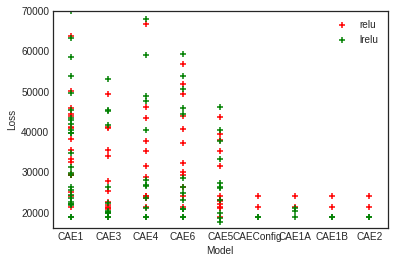

In [5]:
relu = df_res[df_res.activation == "relu"]
lrelu = df_res[df_res.activation == "lrelu"]

plt.scatter('model', "valid_loss", data=relu,  marker="+", color='r')
plt.scatter('model', "valid_loss", data=lrelu,  marker="+", color='g')

plt.ylabel("Loss")
plt.xlabel("Model")
plt.ylim(16000, 70000)
plt.legend(labels=["relu", "lrelu"])
plt.show()

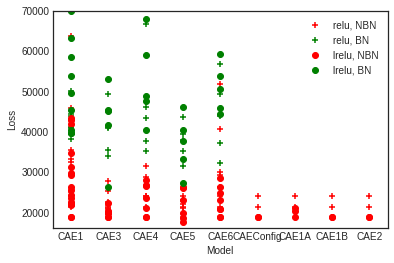

In [6]:
#investigate number of layers
eps = 1e-5

reluNBN = df_res[(df_res.activation == "relu") & (abs(df_res.batch_norm - 0.) < eps)]
reluBN = df_res[(df_res.activation == "relu") & (abs(df_res.batch_norm - 1.) < eps)]
lreluNBN = df_res[(df_res.activation == "lrelu") & (abs(df_res.batch_norm - 0.0) < eps)]
lreluBN = df_res[(df_res.activation == "lrelu") & (abs(df_res.batch_norm - 1.) < eps)]


plt.scatter('model', "valid_loss", data=reluNBN,  marker="+", color='r')
plt.scatter('model', "valid_loss", data=reluBN,  marker="+", color='g')
plt.scatter('model', "valid_loss", data=lreluNBN,  marker="o", color='r')
plt.scatter('model', "valid_loss", data=lreluBN,  marker="o", color='g')

plt.ylabel("Loss")
plt.xlabel("Model")
plt.ylim(16000, 70000)
plt.legend(labels=["relu, NBN", "relu, BN", "lrelu, NBN", "lrelu, BN"])
plt.show()

It turns out that there are lots of duplicates in the above data (as a result of a bug in my code that was giving all models the same number of channels). So remove duplicates and go again: 

### Remove Duplicates

In [7]:
#remove duplicates
columns = list(df_res_original.columns)
columns.remove("model")
columns.remove("path")
print(columns)
df_res_new = df_res_original.loc[df_res_original.astype(str).drop_duplicates(subset=columns, keep="last").index]
#df_res_new = df_res_original.drop_duplicates(subset=columns, keep="last")
df_res_new.shape
df_res = df_res_new
df_res.shape

['valid_loss', 'activation', 'latent_dims', 'num_layers', 'total_channels', 'channels/layer', 'batch_norm', 'channels', 'conv_changeover', 'first_channel', 'learning_rate']


(136, 13)

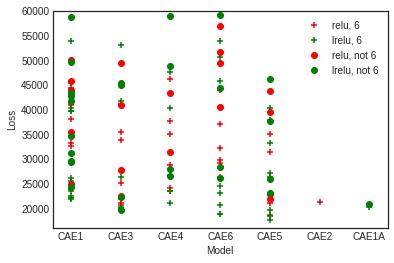

In [9]:
##Plot same graph again:
#investigate number of layers
relu6 = df_res[(df_res.activation == "relu") & (df_res.num_layers == 6)]
relu11 = df_res[(df_res.activation == "relu") & (df_res.num_layers != 6)]
lrelu6 = df_res[(df_res.activation == "lrelu") & (df_res.num_layers == 6)]
lrelu11 = df_res[(df_res.activation == "lrelu") & (df_res.num_layers != 6)]


plt.scatter('model', "valid_loss", data=relu6,  marker="+", color='r')
plt.scatter('model', "valid_loss", data=lrelu6,  marker="+", color='g')
plt.scatter('model', "valid_loss", data=relu11,  marker="o", color='r')
plt.scatter('model', "valid_loss", data=lrelu11,  marker="o", color='g')

plt.ylabel("Loss")
plt.xlabel("Model")
plt.ylim(16000, 60000)
plt.legend(labels=["relu, 6", "lrelu, 6", "relu, not 6", "lrelu, not 6"])
plt.show()

## Each variable plotted against loss:

(16000, 70000)

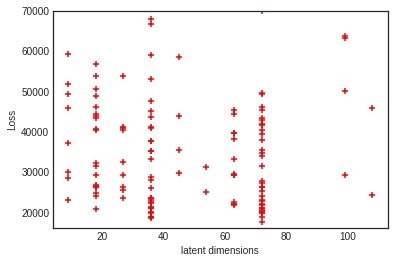

In [11]:
plt.scatter('latent_dims', "valid_loss", data=df_res, marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("latent dimensions")
plt.ylim(16000, 70000)

(16000, 80000)

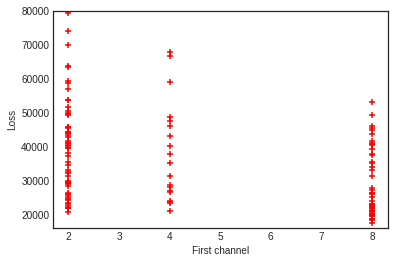

In [13]:
plt.scatter('first_channel', "valid_loss", data=df_res, marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("First channel")
plt.ylim(16000, 80000)

(16000, 80000)

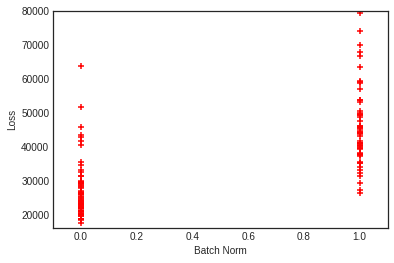

In [14]:
plt.scatter('batch_norm', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Batch Norm")
plt.xlim(-0.1, 1.1)
plt.ylim(16000, 80000)

(16000, 70000)

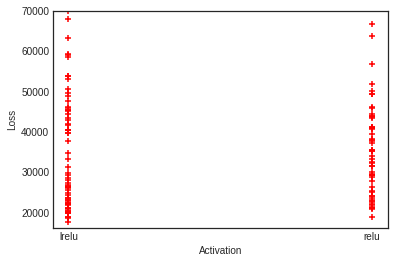

In [15]:
plt.scatter('activation', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Activation")
plt.ylim(16000, 70000)

(16000, 80000)

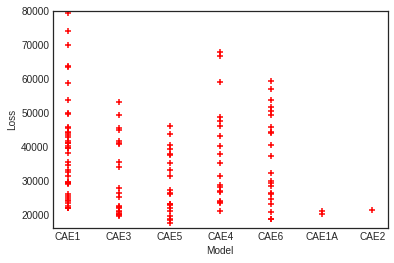

In [18]:
plt.scatter('model', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Model")
plt.ylim(16000, 80000)

(16000, 80000)

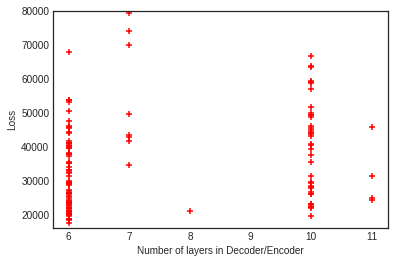

In [20]:
plt.scatter('num_layers', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Number of layers in Decoder/Encoder")
plt.ylim(16000, 80000)

(16000, 80000)

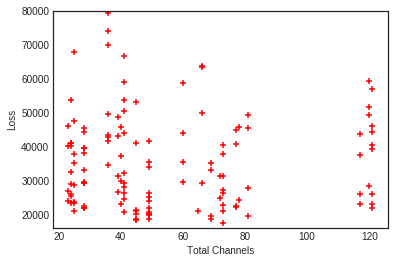

In [21]:
plt.scatter('total_channels', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Total Channels")
plt.ylim(16000, 80000)

(16000, 80000)

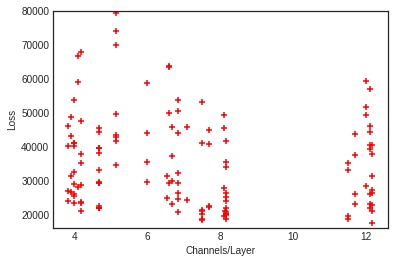

In [22]:
plt.scatter('channels/layer', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Channels/Layer")
plt.ylim(16000, 80000)

(16000, 80000)

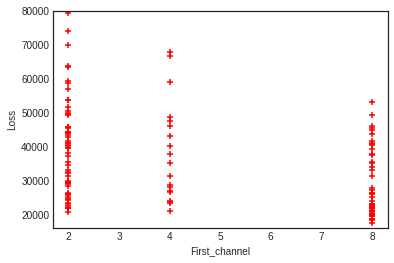

In [23]:
plt.scatter('first_channel', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("First_channel")
plt.ylim(16000, 80000)

(16000, 80000)

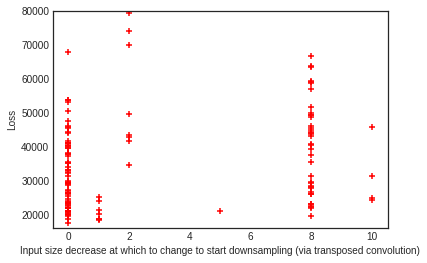

In [24]:
plt.scatter('conv_changeover', "valid_loss", data=df_res,  marker="+", color='r')
plt.ylabel("Loss")
plt.xlabel("Input size decrease at which to change to start downsampling (via transposed convolution)")
plt.ylim(16000, 80000)

## Investigate "band" in loss-model plot

### Extract the different bands and inpsect

In [78]:
band1 = df_res[df_res.valid_loss <  20000]
band2 = df_res[(df_res.valid_loss >  20000) & (df_res.valid_loss < 23000)]
band3 = df_res[(df_res.valid_loss >  23000) & (df_res.valid_loss < 26000)]
band1.head()

,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer,conv_changeover,path
4,CAE1B,18792.643163,lrelu,36,6,45,7.500000,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/5
5,CAE3,18792.643163,lrelu,36,6,45,7.500000,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/25
7,CAE3,18846.080346,lrelu,72,6,49,8.166667,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/24
9,CAE2,18846.080346,lrelu,72,6,49,8.166667,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/28
11,CAE1,18792.643163,lrelu,36,6,45,7.500000,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/33


In [65]:
band3.head()

,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer,conv_changeover,path
1,CAE1,24912.661643,relu,54,11,72,6.545455,10.0,/data/home/jfm1118/DA/experiments/CAE_zoo/3
3,CAE1,24307.036286,lrelu,108,11,78,7.090909,10.0,/data/home/jfm1118/DA/experiments/CAE_zoo/0
10,CAE3,25226.951578,relu,72,6,49,8.166667,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/26
32,CAE1,24041.000436,relu,72,6,49,8.166667,1.0,/data/home/jfm1118/DA/experiments/CAE_zoo2/34


## Investigate Duplicates


In [59]:
#eg1: /data/home/jfm1118/DA/experiments/CAE_zoo2/32 and /data/home/jfm1118/DA/experiments/CAE_zoo2/12
#eg2: /data/home/jfm1118/DA/experiments/CAE_zoo2/31 and /data/home/jfm1118/DA/experiments/CAE_zoo2/27
def get_data_from_path(path):
    for res in results:
        if res["path"] == path:
            return res
    else:
        raise ValueError("No path = {} in 'results' list".format(path))
def print_model(settings):
    model = settings.AE_MODEL_TYPE(**settings.get_kwargs())
    print(settings.__class__.__name__)
    print(model.layers)
    print(settings.CHANNELS)
    
base_exp =  "/data/home/jfm1118/DA/experiments/CAE_zoo2/" 
exp_32 = get_data_from_path(base_exp + "32")["settings"]
exp_12 = get_data_from_path(base_exp + "12")["settings"]

print_model(exp_32)
print()
print_model(exp_12)


CAE1
ModuleList(
  (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (1): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (3): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (4): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (5): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (6): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (7): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (8): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (9): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (10): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (11): ConvTranspose3d(8, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1))
)
[1, 8, 8, 8, 8, 8, 8]

CAE6
ModuleList(
 

In [60]:
base_exp =  "/data/home/jfm1118/DA/experiments/CAE_zoo2/" 
exp_1 = get_data_from_path(base_exp + "31")["settings"]
exp_2 = get_data_from_path(base_exp + "27")["settings"]

print_model(exp_1)
print()
print_model(exp_2)
print(list(range(1, 2*(exp_1.get_num_layers_decode() + 1) + 1, 2)))

CAE2
ModuleList(
  (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (1): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (3): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (4): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (5): Conv3d(8, 4, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (6): ConvTranspose3d(4, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (7): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (8): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (9): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (10): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (11): ConvTranspose3d(8, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1))
)
[1, 8, 8, 8, 8, 8, 4]

CAE3
ModuleList(
 

## Investigate Best

In [87]:
path = "/data/home/jfm1118/DA/experiments/CAE_zoo2/17"
exp = get_data_from_path(base_exp + str(17))["settings"]

print_model(exp_1)

CAE2
ModuleList(
  (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
  (1): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (3): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (4): Conv3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (5): Conv3d(8, 4, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (6): ConvTranspose3d(4, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1), padding=(1, 1, 0))
  (7): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 1))
  (8): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(0, 1, 0))
  (9): ConvTranspose3d(8, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 0))
  (10): ConvTranspose3d(8, 8, kernel_size=(3, 3, 2), stride=(2, 2, 2), padding=(1, 0, 0))
  (11): ConvTranspose3d(8, 1, kernel_size=(3, 3, 3), stride=(1, 1, 1))
)
[1, 8, 8, 8, 8, 8, 4]
